#### Round 1

- Import the required libraries and modules that you would need.

- Read that data into Python and call the dataframe churnData.

- Check the datatypes of all the columns in the data. 
  You will see that the column TotalCharges is object type. 
  Convert this column into numeric type using pd.to_numeric function.

- Check for null values in the dataframe. Replace the null values.

- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    - Split the data into a training set and a test set.

    - Scale the features either by using normalizer or a standard scaler.
      (optional) Fit a logistic Regression model on the training data.

     - Fit a Knn Classifier (NOT KnnRegressor please!) model on the training data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData.shape

(7043, 16)

In [4]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Check the datatypes of all the columns in the data.

churnData.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Convert this column into numeric type using pd.to_numeric function.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [7]:
# Check the datatypes of TotalCharges

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
# Check for null values in each column

churnData.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [9]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
churnData = churnData.fillna(churnData['TotalCharges'].mean())

In [11]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
churnData['Churn'] = churnData['Churn'].replace({'Yes': 1, 'No': 0})

In [14]:
# Define X and y

In [15]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData[['Churn']]

In [16]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [17]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [18]:
# Getting the value counts

np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([5174, 1869], dtype=int64))

In [19]:
# no=0 and yes=1 

y.value_counts()

Churn
0        5174
1        1869
Name: count, dtype: int64

In [20]:
# Split the data into a training set and a test set.

In [21]:
## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression() 

scaler = StandardScaler()
scaler.fit(X_train)
X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)

#where the magic happens

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

C:\Users\calum\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


In [23]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
185,1,0,24.80,24.80
2715,41,0,25.25,996.45
3825,52,0,19.35,1031.70
1807,1,0,76.35,76.35
132,67,0,50.55,3260.10
...,...,...,...,...
6366,64,0,68.30,4378.80
315,51,0,110.05,5686.40
2439,17,0,19.90,329.75
5002,69,0,43.95,2960.10


In [24]:
transformed_sample = scaler.transform(X_test.sample())

In [25]:
log_model.predict_proba(transformed_sample)

array([[0.63954557, 0.36045443]])

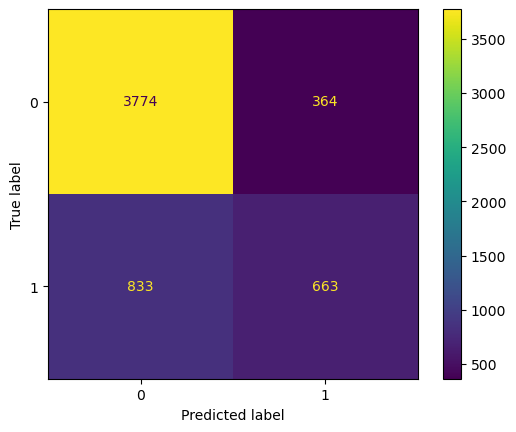

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### train set

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

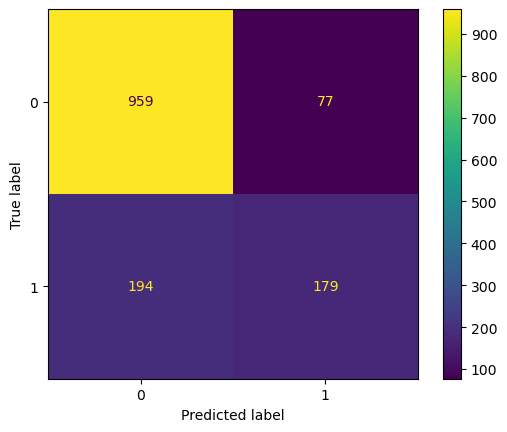

In [27]:
### test

cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

### KNN Classification

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
model = KNeighborsClassifier(n_neighbors=10, weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

C:\Users\calum\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Error_metric,Train,Test
0,Accuracy,0.814519,0.789212
1,Precision,0.738624,0.662393
2,Recall,0.466578,0.415550


In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
y_pred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [32]:
y_test.head(5)

,Churn
185,1
2715,0
3825,0
1807,1
132,0


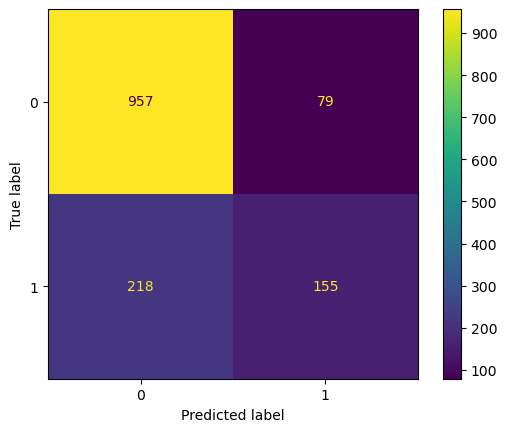

In [33]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.
- Create a function that takes a list of integers as a parameter, 
  iterates over the range as depths, and prints the performance log of the decision tree for each depth

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier()

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


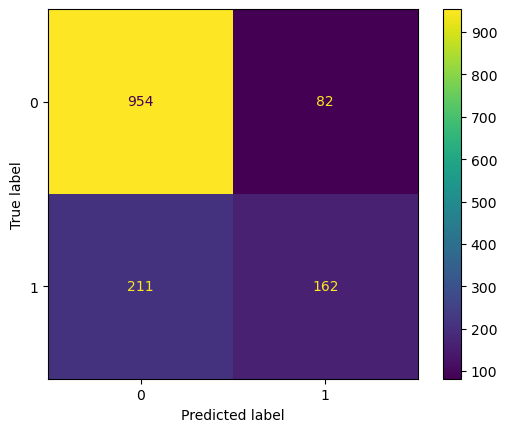

In [35]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

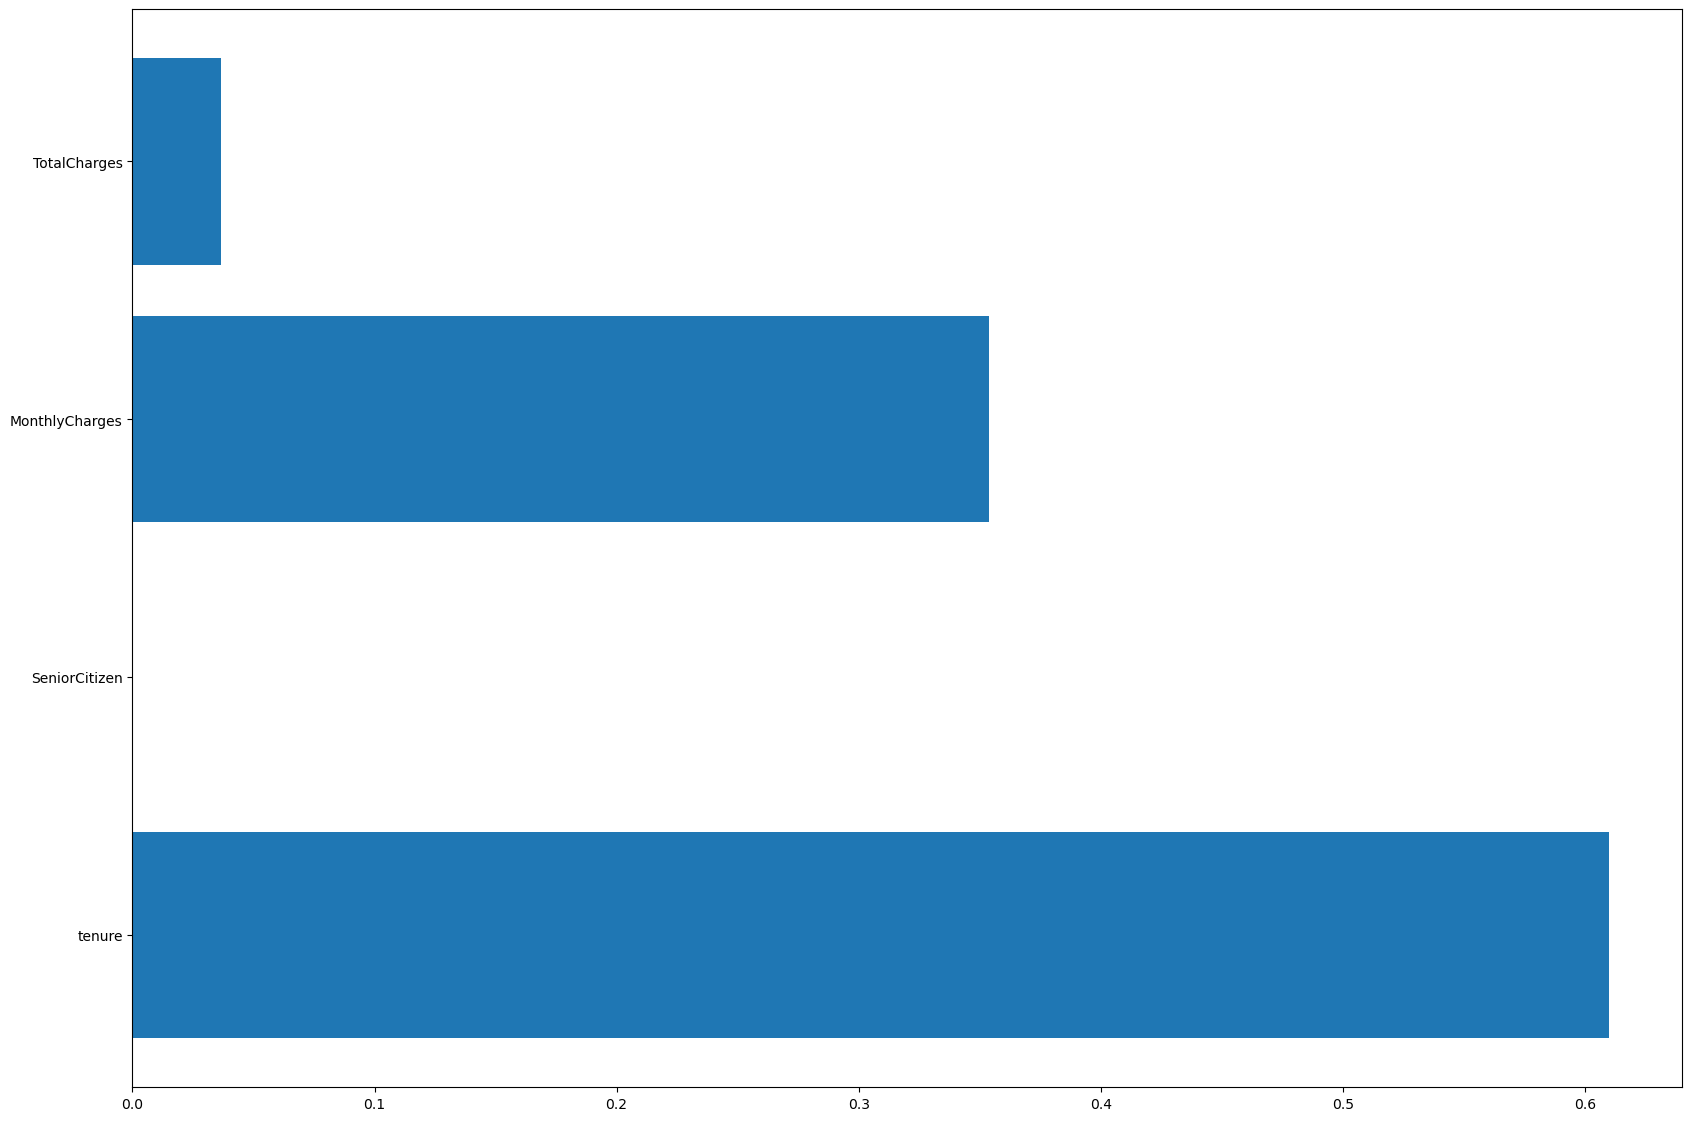

In [36]:
# Feature Importance

plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

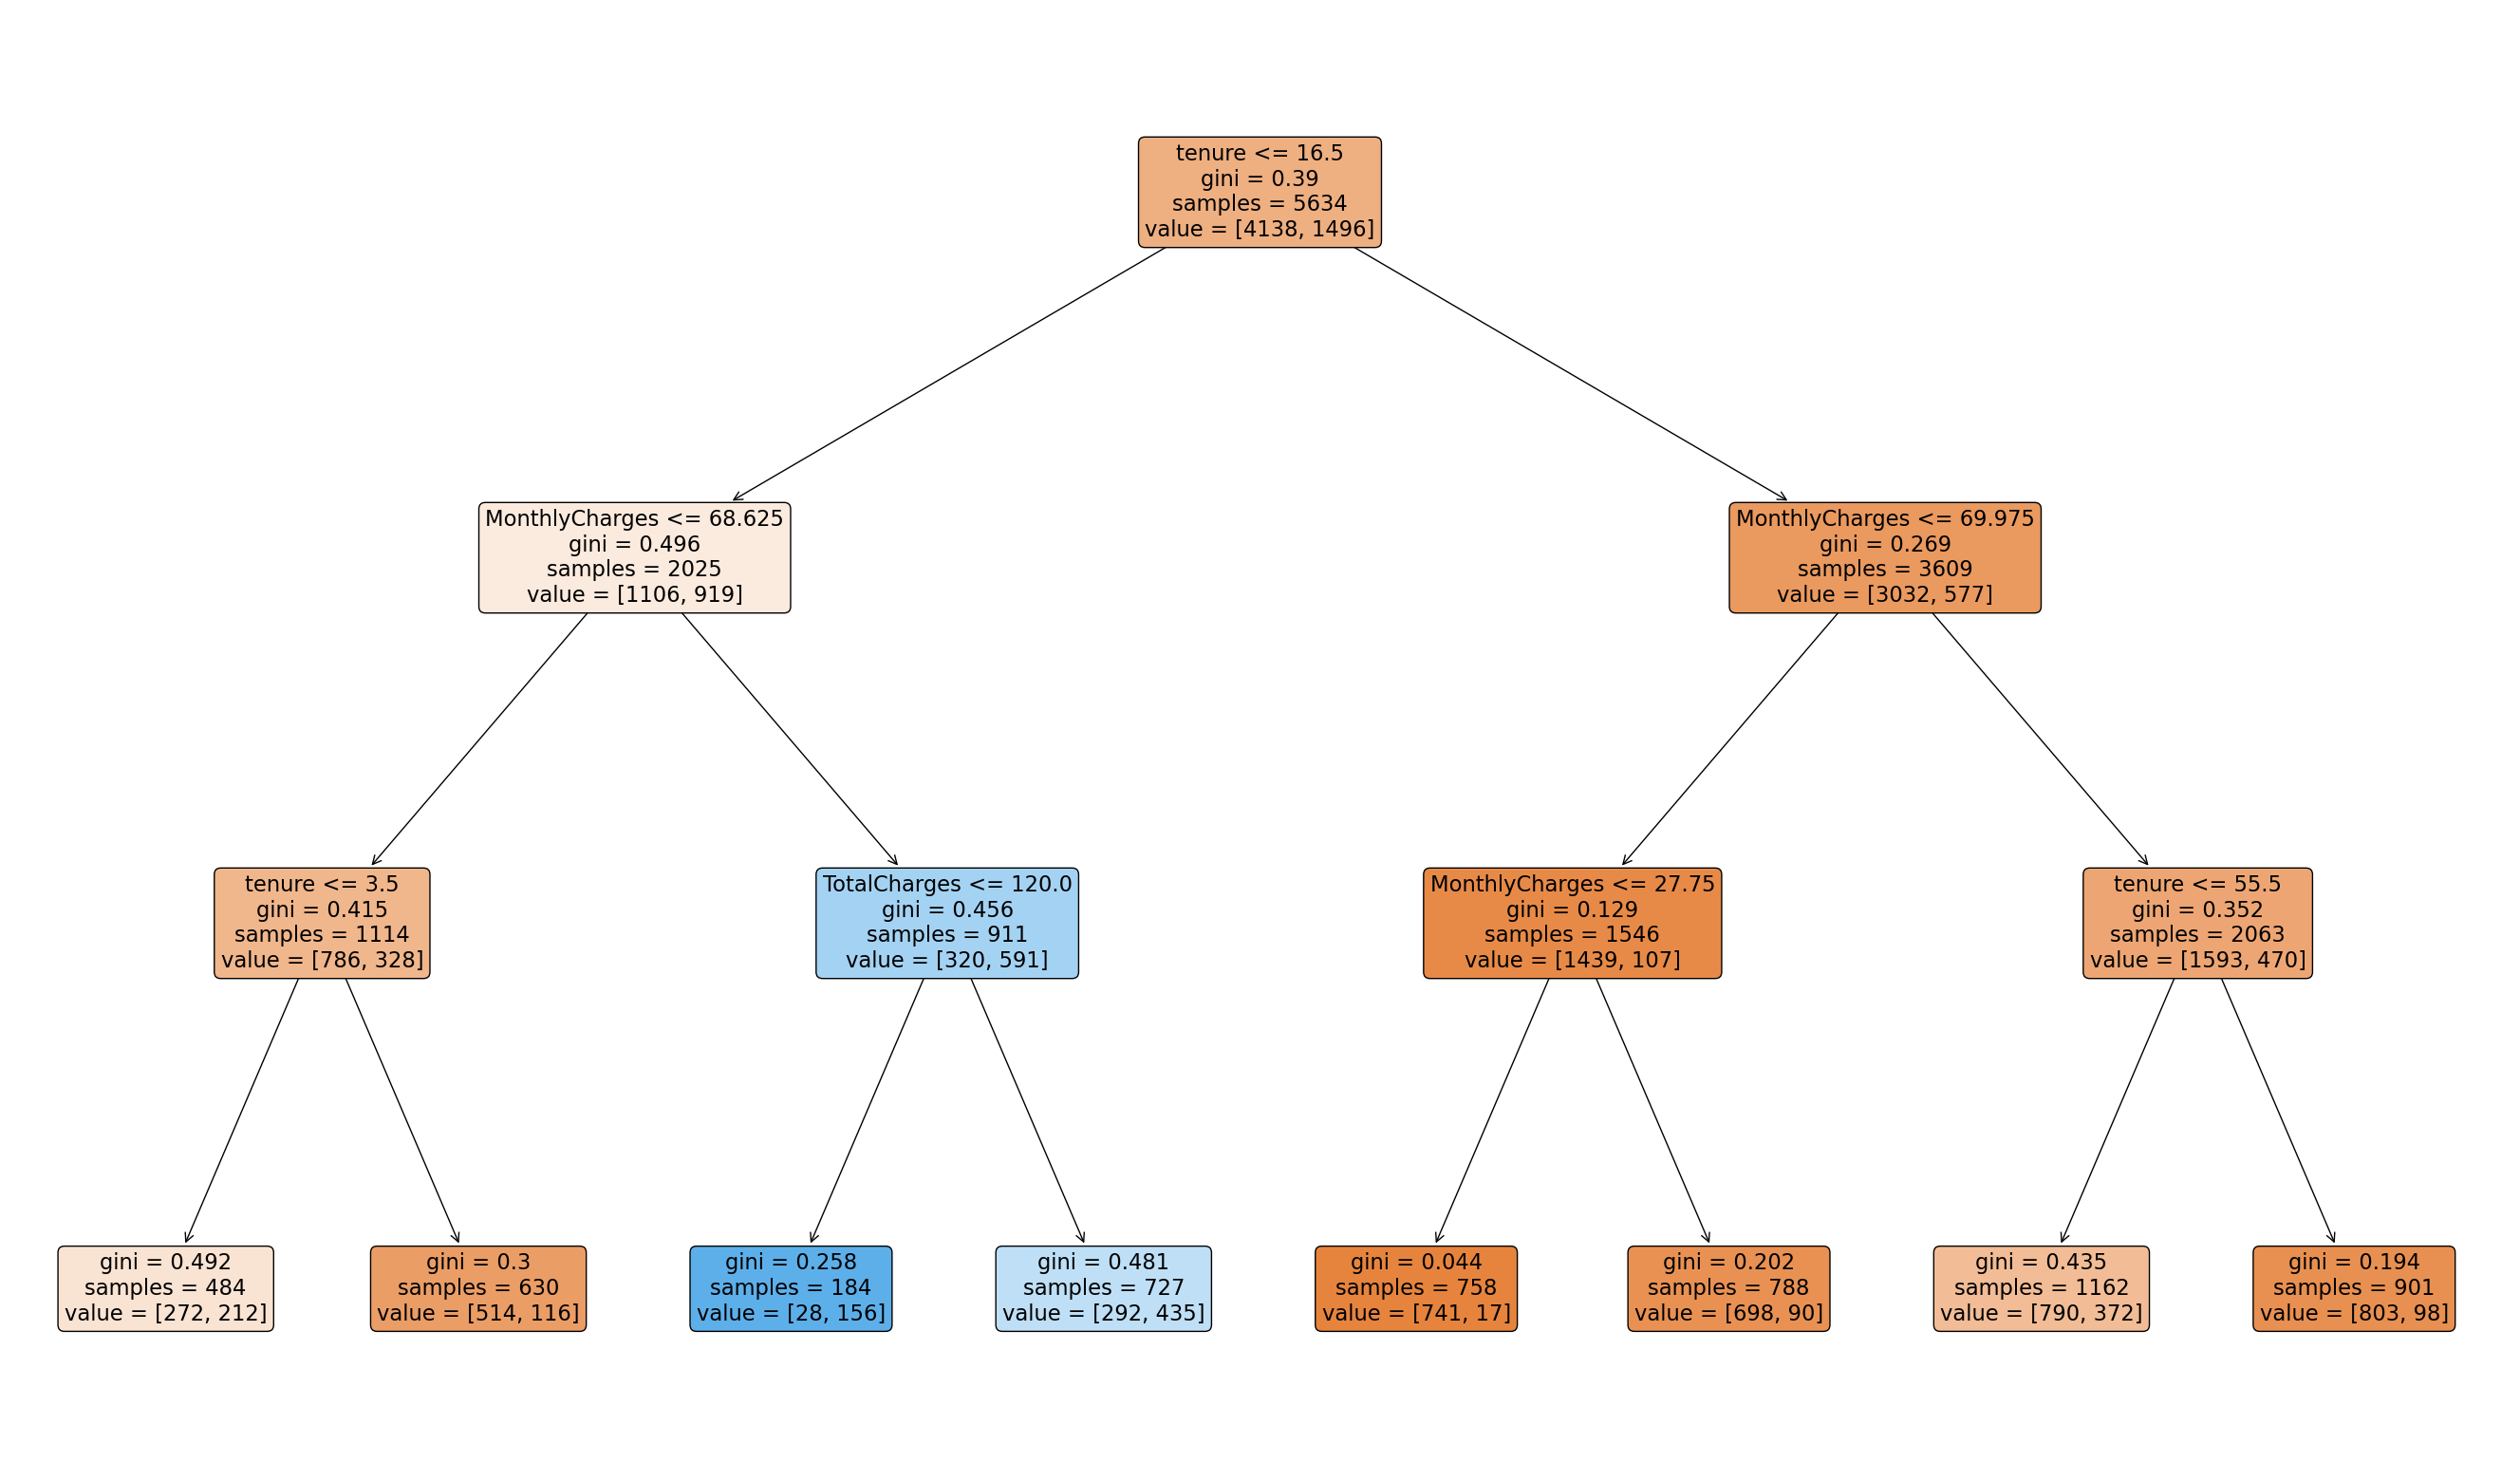

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

In [38]:
# Create a function that takes a list of integers as a parameter, 
# iterates over the range as depths, and prints the performance log of the decision tree for each depth, have already slip the data

def decision_tree_accuracy(d_list, X_train, y_train, X_test, y_test):
    for depth in d_list:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")          

In [39]:
d_list = [1, 2, 3, 4, 5] 
decision_tree_accuracy(d_list, X_train, y_train, X_test, y_test)

Depth: 1, Accuracy: 0.7353
Depth: 2, Accuracy: 0.7921
Depth: 3, Accuracy: 0.7921
Depth: 4, Accuracy: 0.7913
Depth: 5, Accuracy: 0.7906
